In [25]:
import os
import re
import json
import matplotlib.pyplot as plt

In [26]:
NUM_FOLDS = 10
NUM_EPOCHS = 20

In [27]:
def get_sorted(name):
    
    regex = name + r'_\d+.json'
    
    runs = [
        x for x in os.listdir('results') if re.match(regex, x)
    ]
    assert len(runs) == NUM_FOLDS, (name, runs)
    sorted_runs = sorted(runs, key=lambda x: int(x.split('_')[-1].replace('.json', '')))
    json_datas = []
    for run in sorted_runs:
        with open(f'results/{run}', 'r') as f:
            perplexities = json.load(f)['test_set_perplexities']
            assert len(perplexities) == NUM_EPOCHS, name
            json_datas.append(perplexities)
    return json_datas

data = {
    name: get_sorted(name) for name in [
        #'bert',
        'bert_base_uncased',
        'byt5_small',
        'flan_t5_large',
        'gpt2',
        #'roberta',
        'roberta_base',
        #m'xlm_roberta',
        'xlm_roberta_base',
        'xlnet_base_cased'
    ]
}

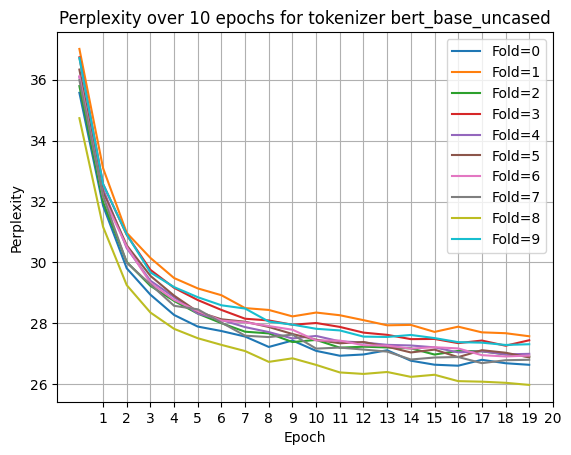

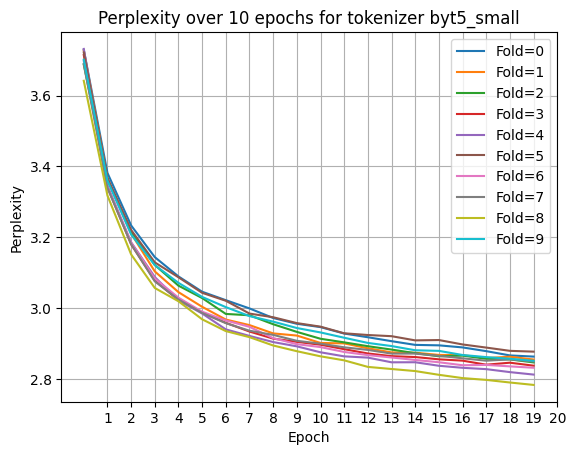

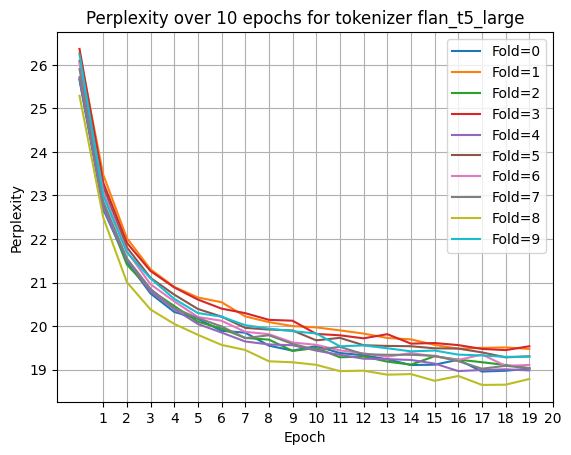

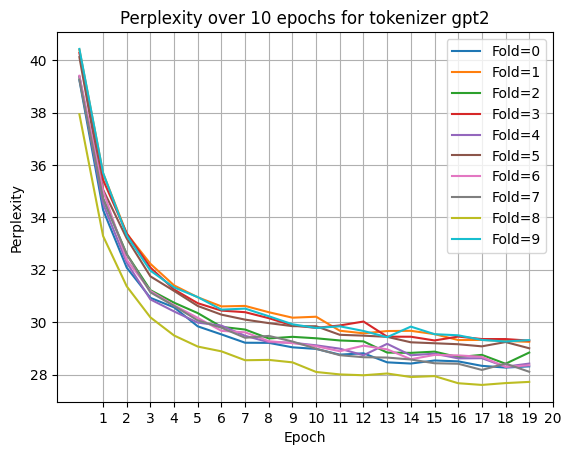

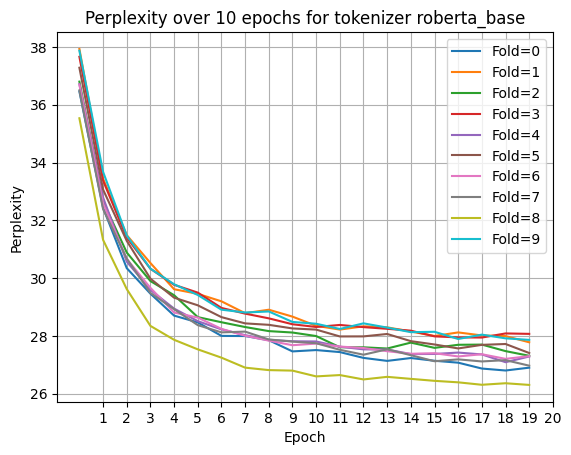

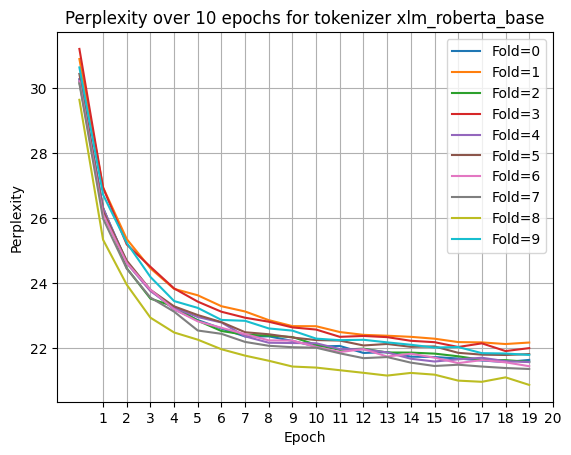

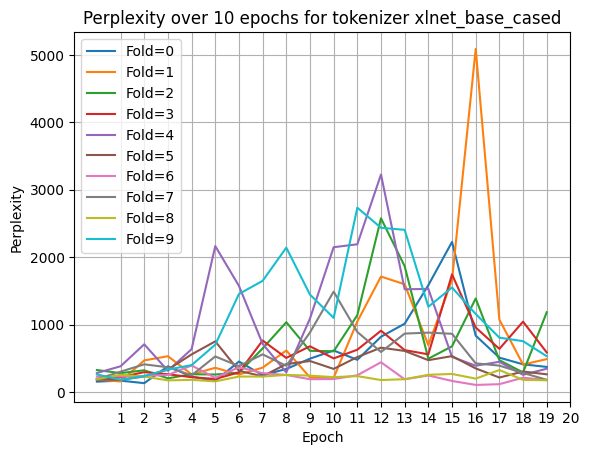

In [28]:
for name in data:
    plt.figure()
    ppls = data[name] # 10 epochs over each of 10 folds
    for i, fold in enumerate(ppls):
        plt.plot(fold, label=f'Fold={i}')
        
    plt.legend()
    plt.ylabel('Perplexity')
    plt.title(f'Perplexity over 10 epochs for tokenizer {name}')
    plt.xlabel('Epoch')
    plt.xticks(range(1, 21))
    plt.grid()
    plt.savefig(f'plots/{name}.png')